In [1]:
import numpy as np
import torch
from gmm import GaussianMixture
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def sample(mu, var, nb_samples=500):
    out = []
    for i in range(nb_samples):
        out += [
            torch.normal(mu, var.sqrt())
        ]
    return torch.stack(out, dim=0)

def plot_2d_sample(sample,color='blue'):
    x = sample[:, 0]
    y = sample[:, 1]
    plt.scatter(x, y, c=color)

(1500, 2)


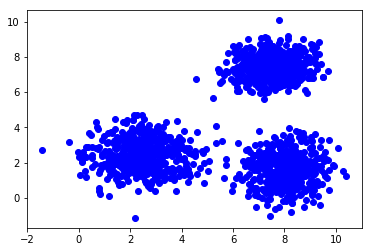

In [3]:
p1 = sample(torch.tensor([2.5, 2.5],dtype=torch.float32),torch.tensor([1.2,0.8],dtype=torch.float32)).numpy()
p2 = sample(torch.tensor([7.5,7.5],dtype=torch.float32),torch.tensor([0.75,0.5],dtype=torch.float32)).numpy()
p3 = sample(torch.tensor([8,1.5],dtype=torch.float32),torch.tensor([0.6,0.8],dtype=torch.float32)).numpy()
data = np.concatenate([p1,p2,p3], axis=0)
print(data.shape)
np.random.shuffle(data)
plot_2d_sample(data)

In [4]:
gmm = GaussianMixture(3,2)

In [5]:
gmm.fit(data)

In [6]:
gmm.mu

Parameter containing:
tensor([[[7.5211, 7.4853],
         [2.4763, 2.4421],
         [8.0317, 1.5601]]])

In [7]:
gmm.var

Parameter containing:
tensor([[[0.7365, 0.4647],
         [1.1139, 0.7907],
         [0.6054, 0.7997]]])

In [8]:
ttt = gmm.predict(data,prob=False)

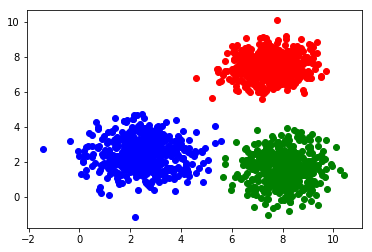

In [9]:
plot_2d_sample(data[ttt==0],color='red')
plot_2d_sample(data[ttt==1],color='blue')
plot_2d_sample(data[ttt==2],color='green')

In [10]:
ttt

array([0, 1, 1, ..., 0, 0, 0])